### Сидоров Никита, БПМ161

# ЛАБОРАТОРНАЯ РАБОТА 3.
## РЕШЕНИЕ СИСТЕМ ЛИНЕЙНЫХ АЛГЕБРАИЧЕСКИХ УРАВНЕНИЙ ПРЯМЫМИ МЕТОДАМИ. ТЕОРИЯ ВОЗМУЩЕНИЙ

### Задание 1 (3.1.23)

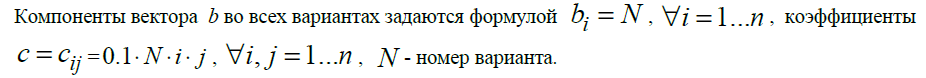

In [68]:
from IPython.display import Image
Image("task1.png")

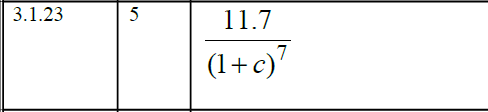

In [69]:
Image("task1_1.png")

In [70]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib inline

Зададим все необходимые переменные и матрицы.

In [71]:
N=23
n=5
b=np.array([N]*n)*1.0
C=np.array([[0.1*N*i*j for j in range(1,n+1)]for i in range(1,n+1)])
A=11.7/(1+C)**7
print('A: ',A)
print('b: ',b)

A:  [[2.74529034e-03 6.77438185e-05 6.09250961e-06 1.01855541e-06
  2.45366784e-07]
 [6.77438185e-05 1.01855541e-06 7.52235550e-08 1.13128949e-08
  2.55098068e-09]
 [6.09250961e-06 7.52235550e-08 5.16377993e-09 7.47521400e-10
  1.64659727e-10]
 [1.01855541e-06 1.13128949e-08 7.47521400e-10 1.06106811e-10
  2.30940901e-11]
 [2.45366784e-07 2.55098068e-09 1.64659727e-10 2.30940901e-11
  4.98993397e-12]]
b:  [23. 23. 23. 23. 23.]


In [72]:
x=np.linalg.solve(A,b)
print('x: ',x)

x:  [ 7.87520182e+10 -1.27712694e+14  7.84563028e+15 -7.76584134e+16
  1.61942733e+17]


In [73]:
cond=np.linalg.cond(A,p=np.inf)
print('cond(A) =', cond)

cond(A) = 53358232357152.695


Введём $\delta$ и найдём векторы $b^i$.

In [74]:
delta=1e-5
b_is=np.array([b for i in range(n)])
for i in range(n):
    b_is[i][i]+=delta
b_is

array([[23.00001, 23.     , 23.     , 23.     , 23.     ],
       [23.     , 23.00001, 23.     , 23.     , 23.     ],
       [23.     , 23.     , 23.00001, 23.     , 23.     ],
       [23.     , 23.     , 23.     , 23.00001, 23.     ],
       [23.     , 23.     , 23.     , 23.     , 23.00001]])

Найдём решения систем $Ax^i=b^i$.

In [76]:
x_is=np.array([np.linalg.solve(A,b_i) for b_i in b_is])
x_is

array([[ 7.87520182e+10, -1.27712694e+14,  7.84563028e+15,
        -7.76584134e+16,  1.61942733e+17],
       [ 7.87520182e+10, -1.27712694e+14,  7.84563027e+15,
        -7.76584133e+16,  1.61942733e+17],
       [ 7.87520207e+10, -1.27712699e+14,  7.84563056e+15,
        -7.76584162e+16,  1.61942739e+17],
       [ 7.87519912e+10, -1.27712648e+14,  7.84562744e+15,
        -7.76583851e+16,  1.61942674e+17],
       [ 7.87520769e+10, -1.27712791e+14,  7.84563625e+15,
        -7.76584727e+16,  1.61942857e+17]])

Вектор относительных погрешностей.

In [77]:
d=np.array([np.linalg.norm(x-x_i,ord=np.inf)/np.linalg.norm(x,ord=np.inf)for x_i in x_is])
d

array([3.62004512e-13, 5.97569265e-10, 3.68975946e-08, 3.66129297e-07,
       7.64611517e-07])

In [78]:
m=np.argmax(d)
print("Индекс максимальной компоненты вектора d:",m)

Индекс максимальной компоненты вектора d: 4


In [79]:
d_theor=cond*np.linalg.norm(b-b_is[m],ord=np.inf)/np.linalg.norm(b,ord=np.inf)
d_theor

23199231.458753336

In [80]:
print('Теоретическая погрешность больше практической в',d_theor/d[m],' раз.')

Теоретическая погрешность больше практической в 30341200644021.8  раз.


Практическая погрешность не превосходит теоретическую, такм образом, мы не получаем никаких противоречий.

### Задание 2 (3.3.6)

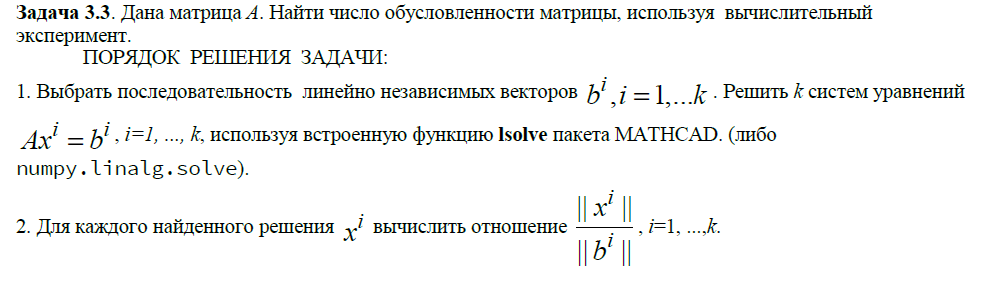

In [81]:
Image("task2.png")

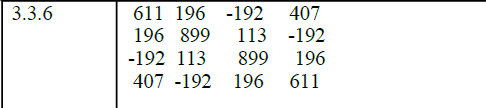

In [82]:
Image("task2_1.png")

Зададим матрицу А.

In [83]:
A=np.array([[611, 196, -192, 407],[196, 899, 113, -192],[-192, 113, 899, 196],[407, -192, 196, 611]])
A

array([[ 611,  196, -192,  407],
       [ 196,  899,  113, -192],
       [-192,  113,  899,  196],
       [ 407, -192,  196,  611]])

Зададим матрицу В из линейно независимых векторов $b^i$.

In [84]:
B=np.eye(4)
B

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [86]:
X=[]
k=4
for i in range(k):
    x=np.linalg.solve(A,B[i])
    print("Решение",i+1,'-й системы:',x)
    X.append(x)

Решение 1 -й системы: [ 0.04059321 -0.01979786  0.01979398 -0.03961087]
Решение 2 -й системы: [-0.01979786  0.01090224 -0.00991408  0.01979398]
Решение 3 -й системы: [ 0.01979398 -0.00991408  0.01090224 -0.01979786]
Решение 4 -й системы: [-0.03961087  0.01979398 -0.01979786  0.04059321]


Найдём сначала нормы всех векторов, а затем норму матрицы $A^{-1}$.

In [89]:
norms_B=np.array([np.linalg.norm(b,ord=np.inf) for b in B])
norms_X=np.array([np.linalg.norm(x,ord=np.inf) for x in X])
det_A_inverse=np.max(norms_X/norms_B)
print("Определитель обратной матрицы:",det_A_inverse)

Определитель обратной матрицы: 0.04059320758006164


In [90]:
cond=np.linalg.det(A)*det_A_inverse
print('cond(A) =', cond)

cond(A) = 409827399.9999995


### Задание 3 (3.8.5)

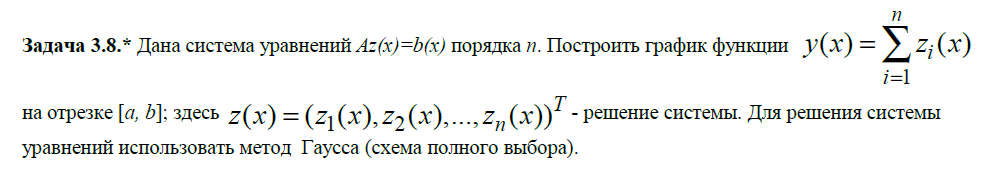

In [91]:
Image("task3.png")

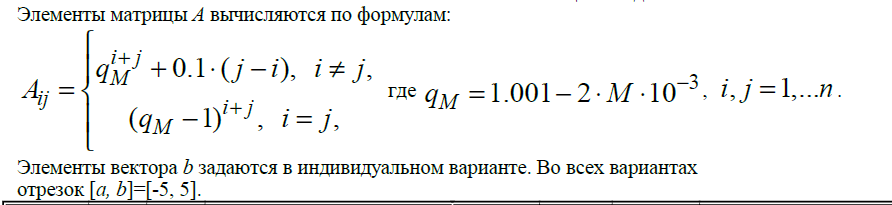

In [93]:
Image("task3_2.png")

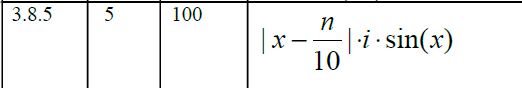

In [92]:
Image("task3_1.png")

Определим необходимые функции.

In [107]:
def swap(A,b,k):
    """Ищет максимальный по модулю элемент в подматрице A[k:,k:], после чего меняет местами строки и столбцы матрицы А так, 
    чтобы этот элемент стоял на позиции A[k,k]. 
    Также соответсвующим образом меняет местами элементы вектора b."""
    
    n = np.argmax(np.abs(A[k:,k:]))
    i = n//A[k:,k:].shape[1]
    j = n%A[k:,k:].shape[1]
    A[k], A[i+k] = A[i+k], A[k].copy()
    A[:,k], A[:,j+k] = A[:,j+k], A[:,k].copy()
    b[k], b[i+k] = b[i+k], b[k].copy()
    return A,b

def forward(A,b):
    """Прямой проход метода Гаусса с полным выбором."""
    
    for k in range(1,A.shape[0]):
        A,b=swap(A,b,k-1)
        for m in range(k,A.shape[0]):
            gamma=A[m][k-1]/A[k-1][k-1]
            A[m]-=gamma*A[k-1]
            b[m]-=gamma*b[k-1]
    return A,b

def Gauss(A_old,b_old):
    """Метод Гаусса.
    
    Возвращает список решений х_s системы линейных уравнений Ах=b. 
    Индексы элементов x_s могут не соответстовать индексам х 
    (это не имеет значения, так как в данной задаче ищется сумма решений)."""
    
    A=A_old.copy()
    b=b_old.copy()
    A,b=forward(A,b)
    for k in reversed(range(A.shape[0]-1)):
        for m in reversed(range(k+1)):
            gamma=A[m][k+1]/A[k+1][k+1]
            b[m]-=gamma*b[k+1]
    x_s=[0]*A.shape[0]
    for k in reversed(range(A.shape[0])):
        x_s[k]=b[k]/A[k][k]
    return x_s

Сначала протестируем метод Гаусса на простых примерах с числами.

In [110]:
A=np.array([[3,2,-5],[2,-1,3],[1,2,-1]])*1.0
b=np.array([-1,13,9])*1.0
print("Наш метод:",Gauss(A,b))
print("Встроенный метод:",np.linalg.solve(A,b))

Наш метод: [4.0, 3.0000000000000004, 5.0]
Встроенный метод: [3. 5. 4.]


In [111]:
A=np.array([[4,2,-1],[5,3,-2],[3,2,-3]])*1.0
b=np.array([1,2,0])*1.0
print("Наш метод:",Gauss(A,b))
print("Встроенный метод:",np.linalg.solve(A,b))

Наш метод: [-0.9999999999999986, 1.0, 2.999999999999998]
Встроенный метод: [-1.  3.  1.]


Как видно, результаты получены верные.

Теперь протестируем на простом примере с функциями.

In [118]:
x = sympy.Symbol("x")
A=np.array([[1,2],[3,4]])*1.0
b=[2*x,sp.Abs(x)]
z=sum(Gauss(A,b))
z

-1.0*x + 0.5*Abs(x)

Результат снова правильный.

Приступим к выполнению задачи из варианта. Зададим переменные и матрицу А.

In [119]:
M=5
n=100
qm=1.001-2*M*1e-3
A=np.array([[qm**(i+j)+0.1*(j-i) for j in range(1,n+1)]for i in range(1,n+1)])
for i in range(n):
    A[i,i]=(qm-1)**(i+i)

Зададим вектор функций.

In [120]:
x=sympy.Symbol("x")
b=[sp.Abs(x-n/100)*i*sp.sin(x) for i in range(n)]

Сложим все решения системы.

In [123]:
y=sympy.lambdify(x,sum(Gauss(A,b)))

Text(0,0.5,'y(x)')

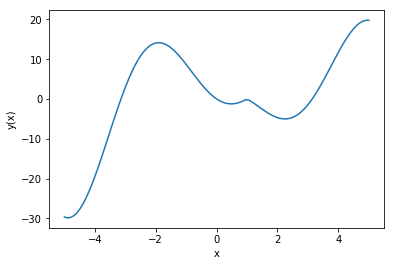

In [124]:
xs=np.linspace(-5,5,100)
plt.plot(xs,y(xs))
plt.xlabel('x')
plt.ylabel('y(x)')